In [186]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout,GRU

In [240]:
data = pd.read_csv('BTC-USD.csv', index_col = 'Date', parse_dates = ['Date'])
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-19,51675.980469,56113.652344,50937.277344,55888.132813,55888.132813,63495496918
2021-02-20,55887.335938,57505.226563,54626.558594,56099.519531,56099.519531,68145460026
2021-02-21,56068.566406,58330.570313,55672.609375,57539.945313,57539.945313,51897585191
2021-02-22,57532.738281,57533.390625,48967.566406,54207.320313,54207.320313,92052420332
2021-02-23,54204.929688,54204.929688,45290.589844,48824.425781,48824.425781,106102492824


In [241]:
scaler = MinMaxScaler()
data_norm = data.copy()
data_norm['Close'] = scaler.fit_transform(data[['Close']])
train = int(0.7*data.shape[0])
test = int(0.3*data.shape[0])
data_train = data_norm.iloc[0:train,:]['Close'].values
data_test = data_norm.iloc[train:train+test,:]['Close'].values

In [242]:
lag = 4
x_train = []
y_train = []
for i in range(lag, len(data_train)):
    x_train.append(data_train[i-lag:i])
    y_train.append(data_train[i])
x_train, y_train = np.array(x_train), np.array(y_train)

In [243]:
dropout_rate = 0.2
batch_size = 50
epochs = 256

def get_model(_rnn_nb):
    model = Sequential()

    model.add(GRU(32, input_shape = (x_train.shape[1], 1), activation='tanh', dropout=dropout_rate, recurrent_dropout=dropout_rate, return_sequences=True))
    
    for _r in _rnn_nb:
        model.add(GRU(_r, activation='tanh', dropout=dropout_rate, recurrent_dropout=dropout_rate, return_sequences=True))
        
    model.add(GRU(32, activation='tanh', dropout=dropout_rate, recurrent_dropout=dropout_rate, return_sequences=False))

    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

In [244]:
model = get_model([32, 32, 32])

In [245]:
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/256
6/6 [==============================] - 21s 17ms/step - loss: 0.2304
Epoch 2/256
6/6 [==============================] - 0s 18ms/step - loss: 0.0906
Epoch 3/256
6/6 [==============================] - 0s 21ms/step - loss: 0.0428
Epoch 4/256
6/6 [==============================] - 0s 14ms/step - loss: 0.0524
Epoch 5/256
6/6 [==============================] - 0s 16ms/step - loss: 0.0347
Epoch 6/256
6/6 [==============================] - 0s 23ms/step - loss: 0.0362
Epoch 7/256
6/6 [==============================] - 0s 22ms/step - loss: 0.0358
Epoch 8/256
6/6 [==============================] - 0s 22ms/step - loss: 0.0313
Epoch 9/256
6/6 [==============================] - 0s 22ms/step - loss: 0.0324
Epoch 10/256
6/6 [==============================] - 0s 22ms/step - loss: 0.0267
Epoch 11/256
6/6 [==============================] - 0s 23ms/step - loss: 0.0276
Epoch 12/256
6/6 [==============================] - 0s 22ms/step - loss: 0.0263
Epoch 13/256
6/6 [==============================

6/6 [==============================] - 0s 21ms/step - loss: 0.0105
Epoch 104/256
6/6 [==============================] - 0s 22ms/step - loss: 0.0118
Epoch 105/256
6/6 [==============================] - 0s 23ms/step - loss: 0.0080
Epoch 106/256
6/6 [==============================] - 0s 23ms/step - loss: 0.0084
Epoch 107/256
6/6 [==============================] - 0s 23ms/step - loss: 0.0097
Epoch 108/256
6/6 [==============================] - 0s 23ms/step - loss: 0.0112
Epoch 109/256
6/6 [==============================] - 0s 23ms/step - loss: 0.0102
Epoch 110/256
6/6 [==============================] - 0s 23ms/step - loss: 0.0092
Epoch 111/256
6/6 [==============================] - 0s 24ms/step - loss: 0.0102
Epoch 112/256
6/6 [==============================] - 0s 22ms/step - loss: 0.0132
Epoch 113/256
6/6 [==============================] - 0s 16ms/step - loss: 0.0088
Epoch 114/256
6/6 [==============================] - 0s 15ms/step - loss: 0.0103
Epoch 115/256
6/6 [=======================

6/6 [==============================] - 0s 21ms/step - loss: 0.0071
Epoch 205/256
6/6 [==============================] - 0s 22ms/step - loss: 0.0095
Epoch 206/256
6/6 [==============================] - 0s 21ms/step - loss: 0.0071
Epoch 207/256
6/6 [==============================] - 0s 21ms/step - loss: 0.0063
Epoch 208/256
6/6 [==============================] - 0s 21ms/step - loss: 0.0061
Epoch 209/256
6/6 [==============================] - 0s 23ms/step - loss: 0.0071
Epoch 210/256
6/6 [==============================] - 0s 20ms/step - loss: 0.0072
Epoch 211/256
6/6 [==============================] - 0s 22ms/step - loss: 0.0069
Epoch 212/256
6/6 [==============================] - 0s 23ms/step - loss: 0.0088
Epoch 213/256
6/6 [==============================] - 0s 24ms/step - loss: 0.0081
Epoch 214/256
6/6 [==============================] - 0s 23ms/step - loss: 0.0086
Epoch 215/256
6/6 [==============================] - 0s 21ms/step - loss: 0.0066
Epoch 216/256
6/6 [=======================

In [246]:
lag = 4
x_test = []
y_test = []
for i in range(lag, len(data_test)):
    x_test.append(data_test[i-lag:i])
    y_test.append(data_test[i])
x_test, y_test = np.array(x_test), np.array(y_test)

In [247]:
pred_price = model.predict(x_test)

Text(0, 0.5, 'Price')

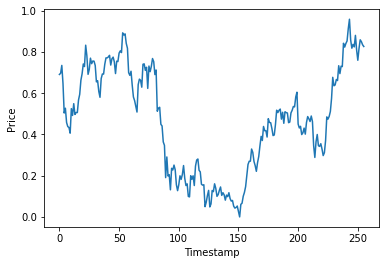

In [248]:
plt.plot(price_train)
plt.xlabel('Timestamp')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

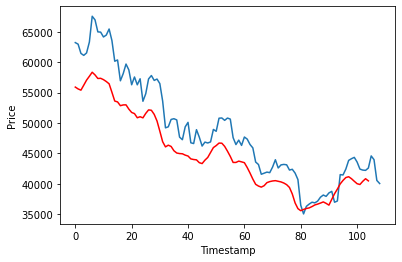

In [249]:
plt.plot(scaler.inverse_transform(pd.DataFrame(price_test)))
plt.plot(scaler.inverse_transform(pd.DataFrame(pred_price)), color = 'red')
plt.xlabel('Timestamp')
plt.ylabel('Price')